<a href="https://colab.research.google.com/github/simjiahui/car-price-lr/blob/main/Car_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Price Prediction

**Group Members**

JAYSHRRIE A/P SANGARANATHAN 

PAAVITHASHNEE A/P RAVI KUMAR 

SIM JIA HUI 

THO ZHI QING 


**Problem Statement**

Geely Automobile is a leading automobile manufacturer based in Hangzhou, China and was founded in 1997 as a subsidiary of Zhejiang Geely Holding Group. A dataset was found in Kaggle that was collected by a consulting firm to help Geely Automobile to conduct some studies to expand their market worldwide. 

Many automobile companies face problems in determining their car prices that is suitable for the market based on the produced car specifications. One of the biggest problems faced by the automobile industry is to identify the features that will influence the car price and deciding reasonable price of car that will be well accepted by the market. Geely Automobile is one of the companies that faced this problem and contacted an automobile consulting company to investigate factors that affect the price of cars. To be more precise, this company wanted information on the pricing of cars in the American market as they aspire to enter the United States market.  

**Objective**

To predict price of car in the American market using regression.

# Step 1: Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
from google.colab import files
uploaded = files.upload()
cars = pd.read_csv('CarPrice_Assignment.csv')
cars

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


# Step 2: Data Exploration

Show first five rows of data:

In [ ]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Describe the shape of the data:

In [ ]:
cars.shape

(205, 26)

There are 205 rows of data and 26 columns (attributes).

In [ ]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# Step 3: Data Cleaning

In [ ]:
cars.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero Quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu MU-X', 'isuzu D-Max ',
       'isuzu D-Max V-Cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

We fix the invalid values which stem from spelling errors in the CarName column.

maxda = mazda

Nissan = nissan

porsche = porcshce

toyota = toyouta

vokswagen = volkswagen = vw

In [ ]:
cars.CarName = cars.CarName.str.lower()

def replace_name(a,b):
    cars.CarName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

cars.CarName.unique()

array(['alfa-romero giulia', 'alfa-romero stelvio',
       'alfa-romero quadrifoglio', 'audi 100 ls', 'audi 100ls',
       'audi fox', 'audi 5000', 'audi 4000', 'audi 5000s (diesel)',
       'bmw 320i', 'bmw x1', 'bmw x3', 'bmw z4', 'bmw x4', 'bmw x5',
       'chevrolet impala', 'chevrolet monte carlo', 'chevrolet vega 2300',
       'dodge rampage', 'dodge challenger se', 'dodge d200',
       'dodge monaco (sw)', 'dodge colt hardtop', 'dodge colt (sw)',
       'dodge coronet custom', 'dodge dart custom',
       'dodge coronet custom (sw)', 'honda civic', 'honda civic cvcc',
       'honda accord cvcc', 'honda accord lx', 'honda civic 1500 gl',
       'honda accord', 'honda civic 1300', 'honda prelude',
       'honda civic (auto)', 'isuzu mu-x', 'isuzu d-max ',
       'isuzu d-max v-cross', 'jaguar xj', 'jaguar xf', 'jaguar xk',
       'maxda rx3', 'maxda glc deluxe', 'mazda rx2 coupe', 'mazda rx-4',
       'mazda glc deluxe', 'mazda 626', 'mazda glc', 'mazda rx-7 gs',
       'mazda glc 

In [ ]:
#Checking for duplicates
cars.loc[cars.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [ ]:
#Checking the columns in the dataset
cars.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

# Step 4: Data Visualization

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


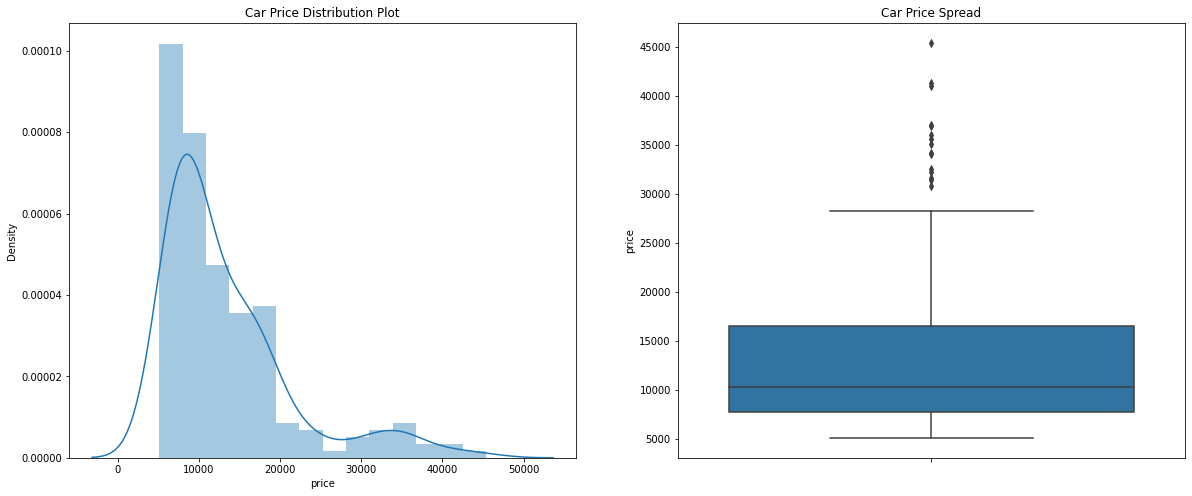

In [ ]:
#Show distribution of car price
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

The distribution of the price is positively skewed, indicating most of the car prices in this data set are less than 20000 USD. This shows that there are very few examples of data that are representing high-priced car. The dataset can be said to be unequal. 

From the constructed boxplot, notice that there are quite a few outliers which may affect the obtained mean. The boxplot also indicates that the distribution is positively skewed with most values range below 20000 USD and is in-line with the distribution plot constructed.

In [ ]:
#Describe parameters of data
print(cars.price.describe(percentiles = [0.25,0.50,0.75,1]))

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
100%     45400.000000
max      45400.000000
Name: price, dtype: float64


**Inference :**

1.   The plot seemed to be right-skewed, meaning that the most prices in the dataset are low (Below 15,000).
There is a significant difference between the mean and the median of the price distribution.
2.   The data points are far spread out from the mean, which indicates a high variance in the car prices.(85% of the prices are below 18,500, whereas the remaining 15% are between 18,500 and 45,400.)





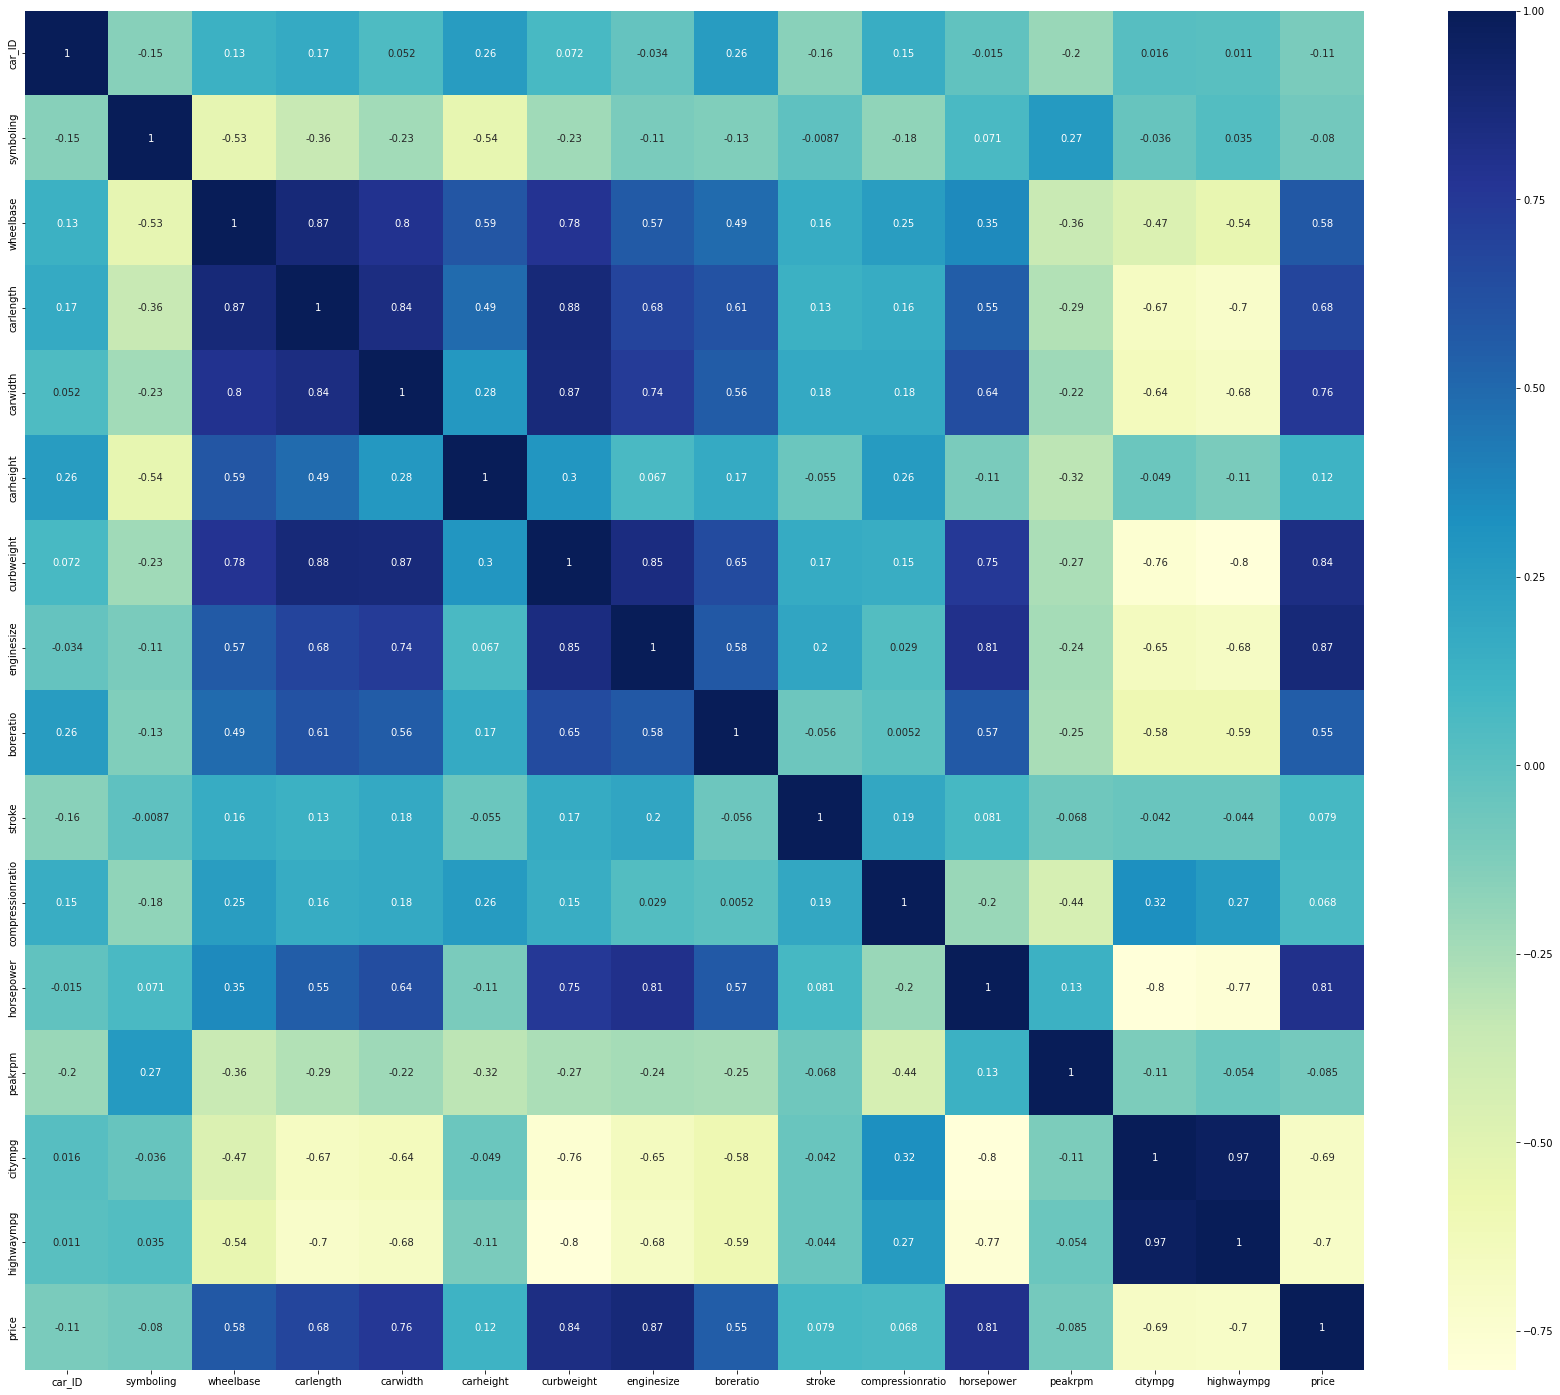

In [ ]:
plt.figure(figsize = (30, 25))
sns.heatmap(cars.corr(), annot = True, cmap="YlGnBu")
plt.show()

There are 5 variables which have the correlation coefficient that is greater or equal to 0.7, indicating there exists strong correlation between the variables.

# Step 5: Feature Selection and Splitting Dataset

In [ ]:
#Choose the attibutes based on the heatmap
cars_lr = cars[['price', 'carwidth', 'curbweight','enginesize','horsepower','highwaympg']]
cars_lr.head()

,price,carwidth,curbweight,enginesize,horsepower,highwaympg
0,13495.0,64.1,2548,130,111,27
1,16500.0,64.1,2548,130,111,27
2,16500.0,65.5,2823,152,154,26
3,13950.0,66.2,2337,109,102,30
4,17450.0,66.4,2824,136,115,22


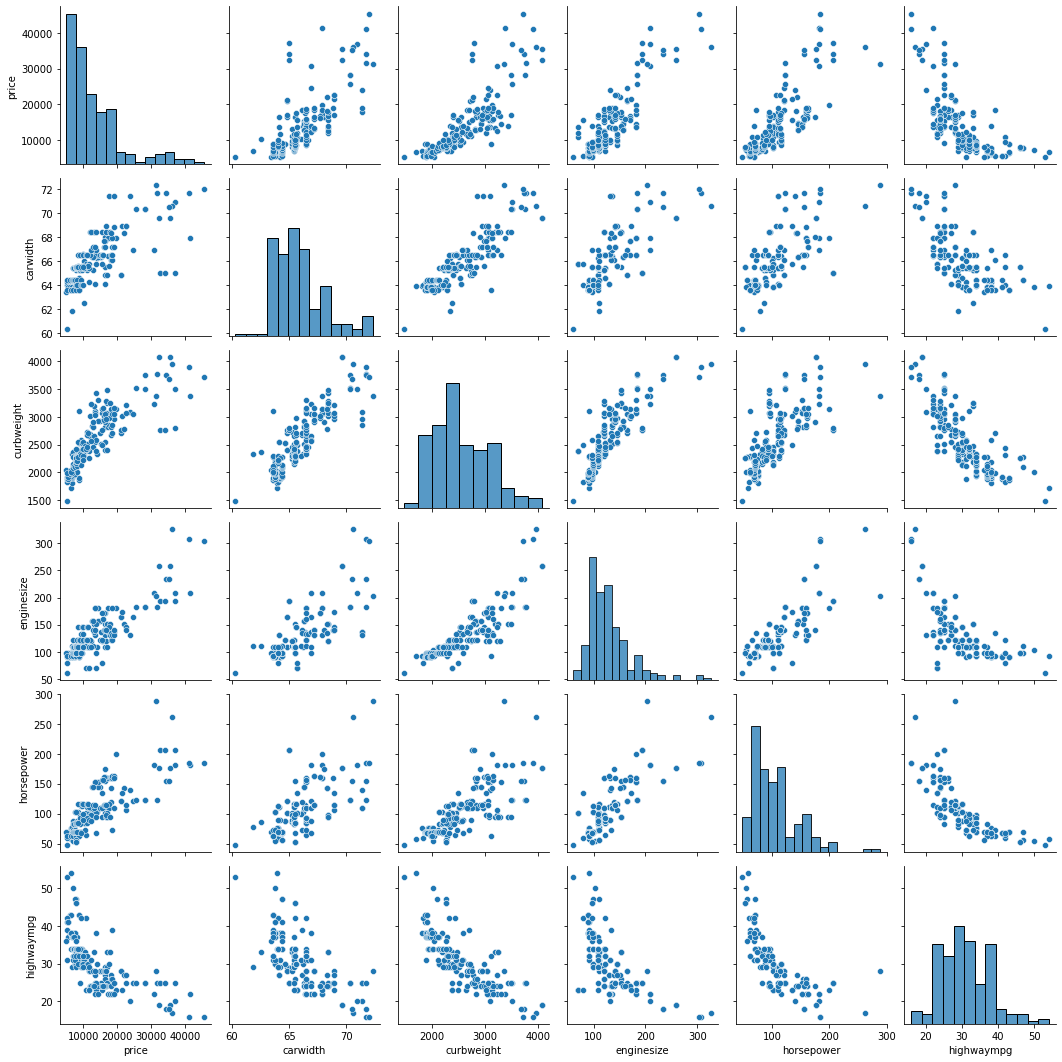

In [ ]:
sns.pairplot(cars_lr)
plt.show()

The above chart is constructed to observe the relationship between the explanatory variables with the target variable “price”. 

Based on the scatter plot of dependent variable “price” and the attributes, it is observed that the “carwidth”, “curbweight”, “enginesize”, and “horsepower” has a positive correlation with “price”. Moreover, most of the points are scattered close to each other and near the imaginary regression line which implies strong positive correlation. 

Meanwhile, the “highwaympg” and “price” have a negative relationship. This means when “highwaympg” increases, the “price” decreases. The points are scattered close to each other and very near to the imaginary regression line which indicates that “highwaympg” has a strong negative correlation with “price”.  

In [ ]:
#Split into 70% train and 30% test set
np.random.seed(0)
df_train, df_test = train_test_split(cars_lr, train_size = 0.7, test_size = 0.3, random_state = 100)

In [ ]:
df_train.head()

,price,carwidth,curbweight,enginesize,horsepower,highwaympg
122,7609.0,63.8,2191,98,68,38
125,22018.0,68.3,2778,151,143,27
166,9538.0,64.0,2300,98,112,29
1,16500.0,64.1,2548,130,111,27
199,18950.0,67.2,3157,130,162,22


In [ ]:
df_train.describe()

,price,carwidth,curbweight,enginesize,horsepower,highwaympg
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,13056.347322,65.839860,2539.510490,124.958042,102.552448,30.874126
std,7807.036883,2.214203,544.650539,40.974034,39.722750,6.973660
min,5118.000000,60.300000,1488.000000,61.000000,48.000000,17.000000
25%,7554.000000,63.950000,2121.000000,97.000000,70.000000,25.000000
50%,10198.000000,65.400000,2405.000000,110.000000,94.000000,31.000000
75%,16465.000000,66.900000,2930.500000,141.000000,116.000000,36.500000
max,41315.000000,72.300000,4066.000000,326.000000,288.000000,54.000000


In [ ]:
#Dividing data into X and y variables
y_train = df_train.pop('price')
X_train = df_train

In [ ]:
y_test = df_test.pop('price')
X_test = df_test

# Step 6: Model Building

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)
y_pred= linear_reg.predict(X_test)
r2_lr = r2_score(y_test,y_pred)
print("Accuracy on Training set: ",linear_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",linear_reg.score(X_test,y_test))
print("R^2 score: ", r2_lr)

Accuracy on Training set:  0.826683912230385
Accuracy on Testing set:  0.7918086905029182
R^2 score:  0.7918086905029182


In [ ]:
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error      :  2597.711256317477
Mean Squared  Error      :  14579449.292942096
Root Mean Squared  Error :  3818.304505005081


In [ ]:
linear_reg.coef_

array([621.25155616,   3.76810885,  63.933772  ,  45.62556599,
        31.07309482])

In [ ]:
linear_reg.intercept_

-51043.32727056988

The estimated regression model obtained from the model built is: 


𝑝𝑟𝑖𝑐𝑒=−51043.32727+621.25155 𝑐𝑎𝑟𝑤𝑖𝑑𝑡ℎ+3.76811 𝑐𝑢𝑟𝑏𝑤𝑒𝑖𝑔ℎ𝑡+63.93377 𝑒𝑛𝑔𝑖𝑛𝑒𝑠𝑖𝑧𝑒+45.62557 ℎ𝑜𝑟𝑠𝑒𝑝𝑜𝑤𝑒𝑟+31.07309 ℎ𝑖𝑔ℎ𝑤𝑎𝑦𝑚𝑝𝑔
price=−51043.32727+621.25155 carwidth+3.76811 curbweight+63.93377 enginesize+45.62557 horsepower+31.07309 highwaympg
 
 

From the model built, it is found that when there is a unit increase in “carwidth,” the car price will increase by $621.25 when all the other variables are kept constant. Similar interpretation goes to the remaining variables based on their respective coefficients. 

Figure 8 shows the results obtained with the accuracy of 82.67% on the training dataset and 79.18% on the testing set. The performance of the model is considered reasonably good in predicting the price as the accuracy of the model is high. Besides, the R2 score that is 79.18% indicates that high variation of the car price can be estimated by the regression model. 

In [ ]:
linear_reg.predict([[65, 2550, 120, 110, 28]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([12507.61300592])

We can use the .predict function to predict the price of a car given the values of the 5 variables. Here, we use the specifications of “carwidth” = 65, “curbweight” = 2550, “enginesize” = 120, “horsepower” = 110 and “highwaympg” = 28.

We can verify this with the equation above.

Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
y_pred= rf_reg.predict(X_test)
r2_rfr = r2_score(y_test,y_pred)
print("Accuracy on Training set: ",rf_reg.score(X_train,y_train))
print("Accuracy on Testing set: ",rf_reg.score(X_test,y_test))
print("R^2 score: ", r2_rfr)

Accuracy on Training set:  0.9861069041636492
Accuracy on Testing set:  0.9147462883414249
R^2 score:  0.9147462883414249


In [ ]:
print('Mean Absolute Error      : ', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared  Error      : ', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared  Error : ', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error      :  1672.3936567588323
Mean Squared  Error      :  5970240.396507637
Root Mean Squared  Error :  2443.407537949336


# Conclusion

From the visualization, we found that only the variables “carwidth”, “curbweight”, “enginesize”, “horsepower” and “highwaympg” were relevant attributes to determine the price of a car. Hence, only those variables were used throughout the analysis. 

Based on the linear regression model using the attributes that placed more importance than others when determining the price of a car, a valid and good quality model was obtained. Modelling an equation, we can predict the price of a car after training the model with sufficient data. The business owner will be able to use this to their advantage, depending on the direction of their company to stock up on higher or lower priced cars. They will also be able to use the model for decision making process. 